In [86]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [87]:
#Import the data source csv file as a data frame
data = pd.read_csv('CardioGoodFitness.csv')
fitness_data = data.copy()
#Print the number of rows and columns
print (fitness_data.shape)
#Check for null values and duplicates
print (fitness_data.isna().sum())
print(fitness_data.duplicated().sum())
#Observation
#There are 180 rows of data with 9 columns
#No null values in the data set
#No Duplicate rows

(180, 9)
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64
0


In [88]:
#Print the first five rows and last five rows to understand the data
print (fitness_data.head())
print (fitness_data.tail())
#Observation
#Data is already sorted in the ascending format of the Product number

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47
    Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
175   TM798   40   Male         21        Single      6        5   83416   
176   TM798   42   Male         18        Single      5        4   89641   
177   TM798   45   Male         16        Single      5        5   90886   
178   TM798   47   Male         18     Partnered      4        5  104581   
179   TM798   48   Male         18     Partnered      4        5   95508   

     Miles  
175    200  
176    200  
177    160  
178    120  
179 

In [89]:
#Get the basic information of the data
print(fitness_data.info())
print(fitness_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%    

In [90]:
#Get all the different products from the dataframe
print (fitness_data['Product'].unique())
#Observation
#There are only 3 different product data

['TM195' 'TM498' 'TM798']


In [91]:
#Get the count for every product
count_by_product = (fitness_data.groupby(["Product"]).count())
#Rename the column Age to count in count_by_product dataframe
count_by_product.rename(columns = ({'Age':'Count'}), inplace = True)
#Print only the product and count column and drop all other columns
print (count_by_product.drop(["Gender","Education","MaritalStatus","Fitness",'Usage',"Income","Miles"],axis=1))
#Observations
#Product TM195 has the highest number of customers among all the three products in the sample data

         Count
Product       
TM195       80
TM498       60
TM798       40


  Product  Gender  Count
0   TM195  Female     40
1   TM195    Male     40
2   TM498  Female     29
3   TM498    Male     31
4   TM798  Female      7
5   TM798    Male     33
<class 'pandas.core.frame.DataFrame'>
(6, 3)


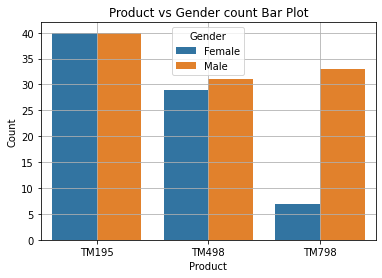

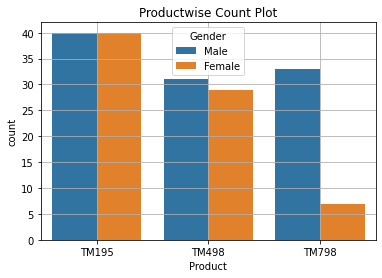

In [92]:
#Get the product,Genderwise count for all three products
count_by_product_gender = (fitness_data.groupby(["Product","Gender"]).count().reset_index())
#Rename the column Usage to count in count_by_product dataframe
count_by_product_gender.rename(columns = ({'Usage':'Count'}), inplace = True)
#Print only the product,gender,age and count column and drop all other columns
count_by_product_gender.drop(["Age","Education","MaritalStatus","Fitness","Income","Miles"],axis=1)
plot_count_by_product_gender = count_by_product_gender.drop(["Age","Education","MaritalStatus","Fitness","Income","Miles"],axis=1)
print (plot_count_by_product_gender)
print (type(plot_count_by_product_gender))
print (plot_count_by_product_gender.shape)
#Plot Univariate bar for Product vs Gender count
sns.barplot(x = "Product" , y = "Count" , hue = "Gender" , data = plot_count_by_product_gender ,ci=None)
plt.title("Product vs Gender count Bar Plot")
plt.xlabel("Product")
plt.ylabel("Count")
plt.grid(True)
plt.show()
#Cross verifying the above code via countplot method
sns.countplot(x = "Product", hue = "Gender", data = fitness_data)
plt.title("Productwise Count Plot")
plt.xlabel("Product")
plt.grid(True)
plt.show()
#Observation
#TM195 is purchased equally by men and women
#TM498 is purchased  almost equally by men and women
#TM798 is purchased by men more than women

Product            object
Age                 int64
Gender             object
Education           int64
MaritalStatus      object
Usage               int64
Fitness             int64
Income              int64
Miles               int64
AgeRange         category
dtype: object
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0   TM195   18    Male         14        Single      3        4   29562   
1   TM195   19    Male         15        Single      2        3   31836   
2   TM195   19  Female         14     Partnered      4        3   30699   
3   TM195   19    Male         12        Single      3        3   32973   
4   TM195   20    Male         13     Partnered      4        2   35247   

   Miles AgeRange  
0    112  (0, 20]  
1     75  (0, 20]  
2     66  (0, 20]  
3     85  (0, 20]  
4     47  (0, 20]  


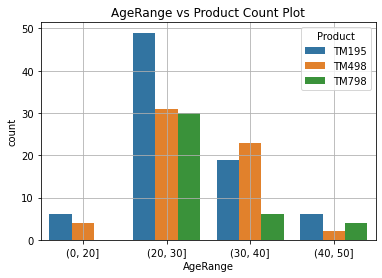

In [93]:
#Group the Age into AgeRange bucket by adding a new column to the dataframe 
fitness_data['AgeRange'] = pd.cut(x = fitness_data['Age'],bins = [0,20,30,40,50])
print(fitness_data.dtypes)
print(fitness_data.head())
#Plot to check the Agegroup and Productwise count
sns.countplot(x ="AgeRange", hue = "Product", data = fitness_data)
plt.title("AgeRange vs Product Count Plot")
plt.xlabel("AgeRange")
plt.grid(True)
plt.show()
#Observations
#The maximum number of customers for each of the three products are in the agerange 20 - 35 years of age.

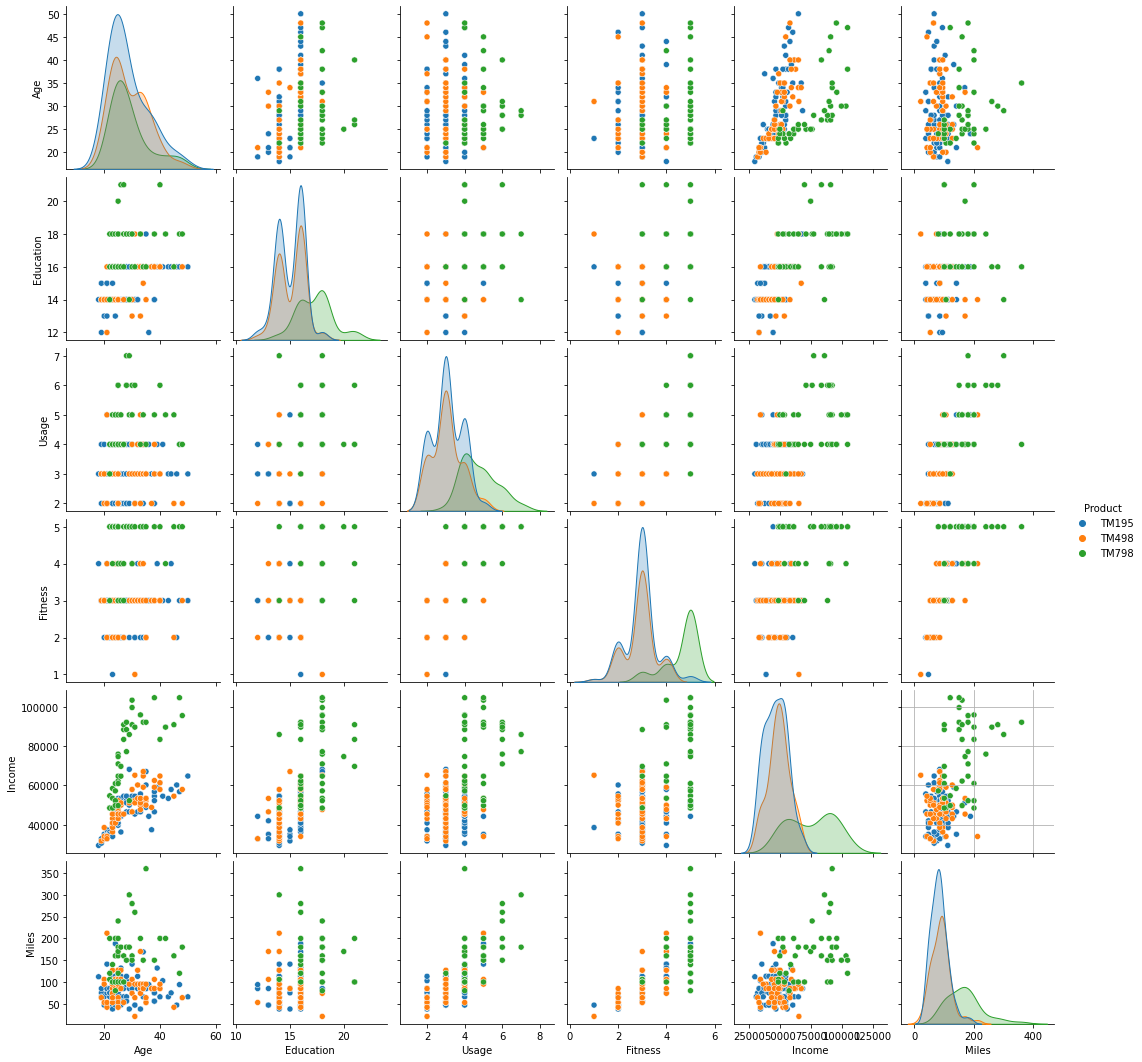

In [94]:
#Plot the pairplot to check the relations between numeric variables
sns.pairplot(fitness_data, hue = "Product")
plt.grid(True)
plt.show()

(80, 10)
col_0     Count
AgeRange       
(0, 20]       6
(20, 30]     49
(30, 40]     19
(40, 50]      6


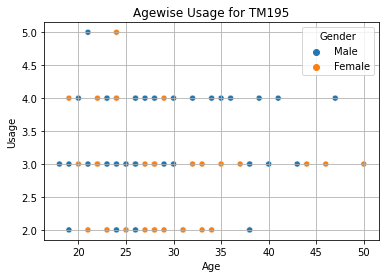

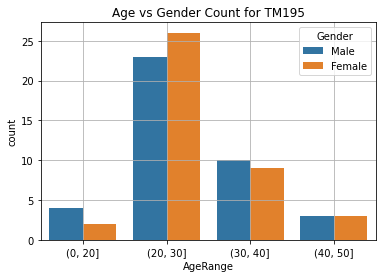

In [95]:
#Split the data by Product(TM195) and get the Agerange count
TM195 = fitness_data[fitness_data.Product =='TM195']
print(TM195.shape)
TM195_AgeRange_Count = pd.crosstab(index = TM195["AgeRange"], columns = "Count")
print(TM195_AgeRange_Count)
#Group the TM195 data further by Gender
TM195_Male = TM195[TM195.Gender =='Male']
TM195_Female = TM195[TM195.Gender =='Female']
#Plot AgeRange vs Usage for TM195
sns.scatterplot(x = "Age" , y = "Usage", hue = "Gender" , data = TM195 )
plt.title("Agewise Usage for TM195")
plt.grid(True)
plt.show()
#Plot to show the Age and Genderwise count for TM195
sns.countplot(x = "AgeRange" , hue = "Gender" , data = TM195 )
plt.title("Age vs Gender Count for TM195")
plt.grid(True)          
plt.show()

(60, 10)
col_0     Count
AgeRange       
(0, 20]       4
(20, 30]     31
(30, 40]     23
(40, 50]      2


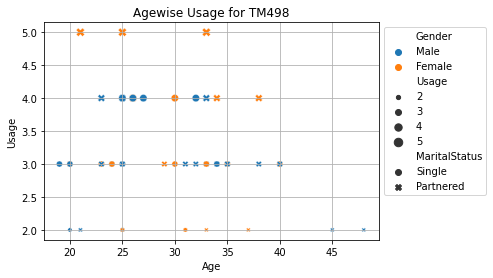

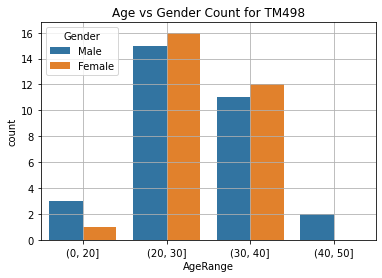

In [96]:
#Split the data by Product(TM498) and get the Agerange count
TM498 = fitness_data[fitness_data.Product =='TM498']
print(TM498.shape)
TM498_AgeRange_Count = pd.crosstab(index = TM498["AgeRange"], columns = "Count")
print(TM498_AgeRange_Count)
#Group the TM498 data further by Gender 
TM498_Male = TM498[TM498.Gender =='Male']
TM498_Female = TM498[TM498.Gender =='Female']
#Plot AgeRange vs Usage for TM498
sns.scatterplot(x = "Age" , y = "Usage", hue = "Gender" ,size = "Usage",style ="MaritalStatus" ,data = TM498 )
plt.title("Agewise Usage for TM498")
plt.legend(bbox_to_anchor = (1,1))
plt.grid(True)
plt.show()
#Plot to show the Age and Genderwise count for TM498
sns.countplot(x = "AgeRange" , hue = "Gender" , data = TM498 )
plt.title("Age vs Gender Count for TM498")
plt.grid(True)
plt.show()

(40, 10)
col_0     Count
AgeRange       
(20, 30]     30
(30, 40]      6
(40, 50]      4


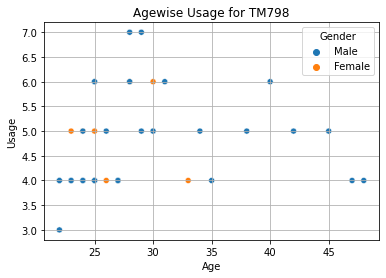

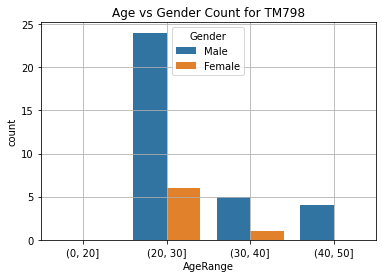

In [97]:
#Split the data by Product(TM798) and get the Agerange count
TM798 = fitness_data[fitness_data.Product =='TM798']
print(TM798.shape)
TM798_AgeRange_Count = pd.crosstab(index = TM798["AgeRange"], columns = "Count")
print(TM798_AgeRange_Count)
#Group the TM798 data further by Gender
TM798_Male = TM798[TM798.Gender =='Male']
TM798_Female = TM798[TM798.Gender =='Female']
#Plot AgeRange vs Usage for TM798
sns.scatterplot(x = "Age" , y = "Usage", hue = "Gender" , data = TM798 )
plt.title("Agewise Usage for TM798")
plt.grid(True)
plt.show()
#Plot to show the Age and Genderwise count for TM798
sns.countplot(x = "AgeRange" , hue = "Gender" , data = TM798 )
plt.title("Age vs Gender Count for TM798")
plt.grid(True)
plt.show()

In [98]:
#Check the basic statitics of the TM195 data
print(TM195.describe())
print(TM195_Male.describe())
print(TM195_Female.describe())

             Age  Education      Usage   Fitness       Income       Miles
count  80.000000  80.000000  80.000000  80.00000     80.00000   80.000000
mean   28.550000  15.037500   3.087500   2.96250  46418.02500   82.787500
std     7.221452   1.216383   0.782624   0.66454   9075.78319   28.874102
min    18.000000  12.000000   2.000000   1.00000  29562.00000   38.000000
25%    23.000000  14.000000   3.000000   3.00000  38658.00000   66.000000
50%    26.000000  16.000000   3.000000   3.00000  46617.00000   85.000000
75%    33.000000  16.000000   4.000000   3.00000  53439.00000   94.000000
max    50.000000  18.000000   5.000000   5.00000  68220.00000  188.000000
             Age  Education      Usage    Fitness        Income       Miles
count  40.000000  40.000000  40.000000  40.000000     40.000000   40.000000
mean   28.650000  14.975000   3.275000   3.050000  46815.975000   89.375000
std     7.419828   1.349026   0.750641   0.677476   9022.407705   28.573511
min    18.000000  12.000000   

In [99]:
#Check the basic statitics of the TM498 data
print(TM498.describe())
print(TM498_Male.describe())
print(TM498_Female.describe())

             Age  Education      Usage   Fitness        Income       Miles
count  60.000000  60.000000  60.000000  60.00000     60.000000   60.000000
mean   28.900000  15.116667   3.066667   2.90000  48973.650000   87.933333
std     6.645248   1.222552   0.799717   0.62977   8653.989388   33.263135
min    19.000000  12.000000   2.000000   1.00000  31836.000000   21.000000
25%    24.000000  14.000000   3.000000   3.00000  44911.500000   64.000000
50%    26.000000  16.000000   3.000000   3.00000  49459.500000   85.000000
75%    33.250000  16.000000   3.250000   3.00000  53439.000000  106.000000
max    48.000000  18.000000   5.000000   4.00000  67083.000000  212.000000
             Age  Education     Usage    Fitness        Income       Miles
count  31.000000  31.000000  31.00000  31.000000     31.000000   31.000000
mean   28.709677  15.032258   3.00000   2.935484  48634.258065   88.483871
std     7.439505   1.168585   0.68313   0.573613   9356.202876   33.625259
min    19.000000  12.0000

In [100]:
#Check the basic statitics of the TM798 data
print(TM798.describe())
print(TM798_Male.describe())
print(TM798_Female.describe())

             Age  Education      Usage    Fitness        Income       Miles
count  40.000000  40.000000  40.000000  40.000000      40.00000   40.000000
mean   29.100000  17.325000   4.775000   4.625000   75441.57500  166.900000
std     6.971738   1.639066   0.946993   0.667467   18505.83672   60.066544
min    22.000000  14.000000   3.000000   3.000000   48556.00000   80.000000
25%    24.750000  16.000000   4.000000   4.000000   58204.75000  120.000000
50%    27.000000  18.000000   5.000000   5.000000   76568.50000  160.000000
75%    30.250000  18.000000   5.000000   5.000000   90886.00000  200.000000
max    48.000000  21.000000   7.000000   5.000000  104581.00000  360.000000
             Age  Education      Usage    Fitness         Income       Miles
count  33.000000  33.000000  33.000000  33.000000      33.000000   33.000000
mean   29.545455  17.212121   4.727273   4.636364   75825.030303  164.121212
std     7.462786   1.634732   0.977008   0.652791   18675.002521   60.014455
min    2

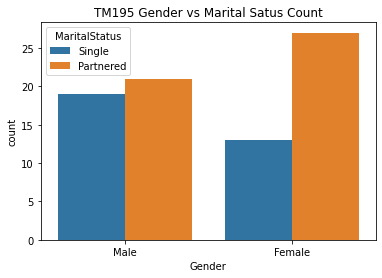

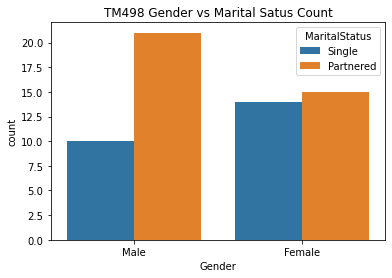

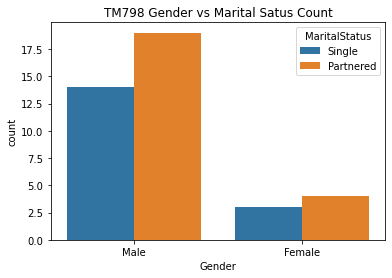

In [101]:
#Check for the Marital Status count for every product
sns.countplot(x = "Gender", hue = "MaritalStatus", data = TM195)
plt.title("TM195 Gender vs Marital Satus Count")
plt.show()
sns.countplot(x = "Gender", hue = "MaritalStatus", data = TM498)
plt.title("TM498 Gender vs Marital Satus Count")
plt.show()
sns.countplot(x = "Gender", hue = "MaritalStatus", data = TM798)
plt.title("TM798 Gender vs Marital Satus Count")
plt.show()

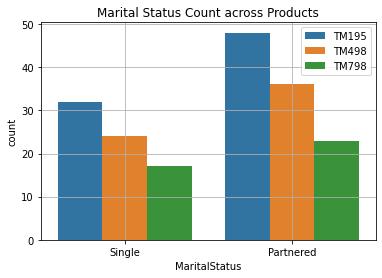

In [102]:
#Univariate plot for Marital Status for all three Products
sns.countplot(x = "MaritalStatus", hue = "Product", data = fitness_data)
plt.legend(bbox_to_anchor =(1,1))
plt.title("Marital Status Count across Products")
plt.grid(True)
plt.show()
#Observations
#Partnered customers are more for all three products

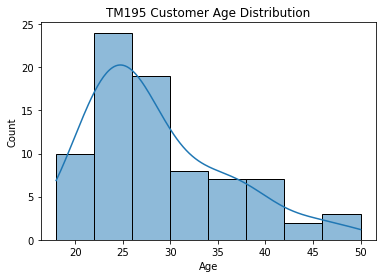

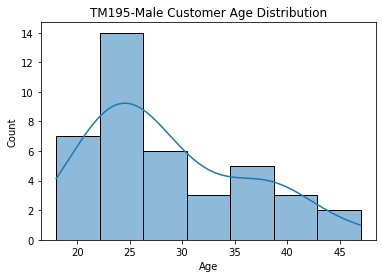

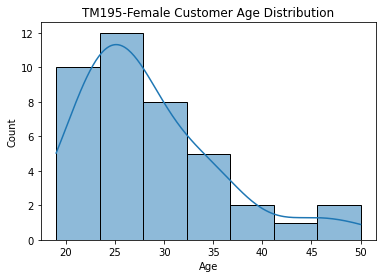

In [103]:
#Univariate Analysis of Age grouped by Gender for the Product TM195
sns.histplot(x = "Age", data = TM195, kde = True)
plt.title("TM195 Customer Age Distribution")
plt.show()
sns.histplot(x = "Age", data = TM195_Male, kde = True)
plt.title("TM195-Male Customer Age Distribution")
plt.show()
sns.histplot(x = "Age", data = TM195_Female, kde = True)
plt.title("TM195-Female Customer Age Distribution")
plt.show()

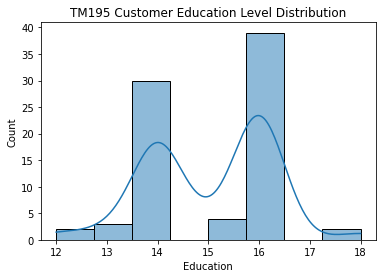

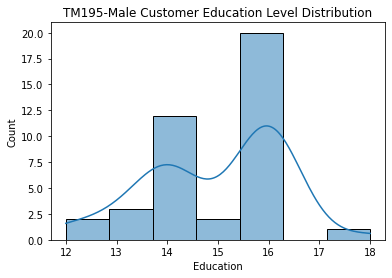

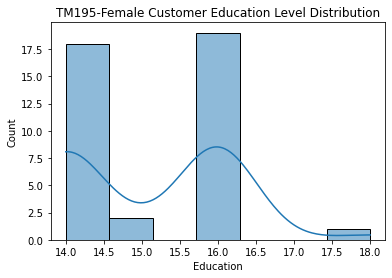

In [104]:
#Univariate Analysis of Education grouped by Gender for the Product TM195
sns.histplot(x = "Education", data = TM195, kde = True)
plt.title("TM195 Customer Education Level Distribution")
plt.show()
sns.histplot(x = "Education", data = TM195_Male, kde = True)
plt.title("TM195-Male Customer Education Level Distribution")
plt.show()
sns.histplot(x = "Education", data = TM195_Female, kde = True)
plt.title("TM195-Female Customer Education Level Distribution")
plt.show()

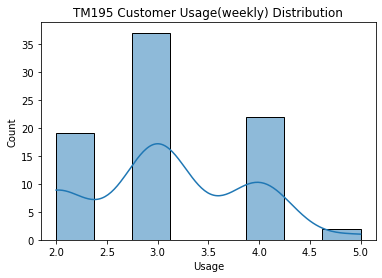

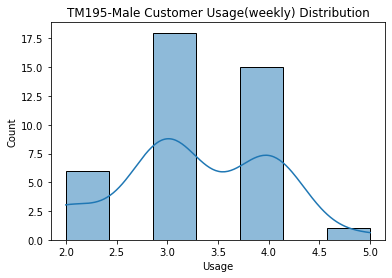

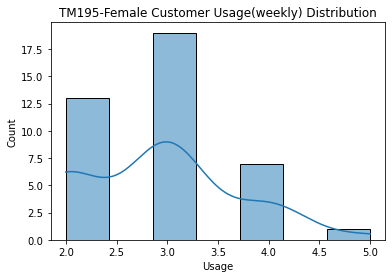

In [105]:
#Univariate Analysis of Usage grouped by Gender for the Product TM195
sns.histplot(x = "Usage", data = TM195, kde = True)
plt.title("TM195 Customer Usage(weekly) Distribution")
plt.show()
sns.histplot(x = "Usage", data = TM195_Male, kde = True)
plt.title("TM195-Male Customer Usage(weekly) Distribution")
plt.show()
sns.histplot(x = "Usage", data = TM195_Female, kde = True)
plt.title("TM195-Female Customer Usage(weekly) Distribution")
plt.show()

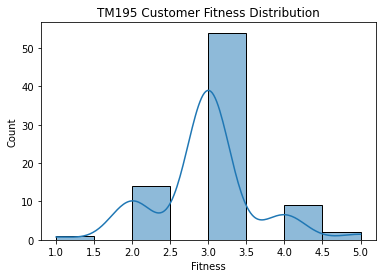

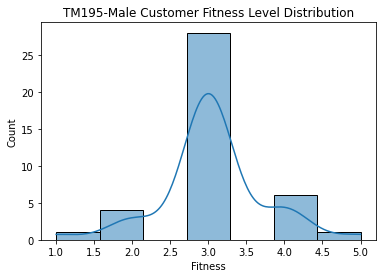

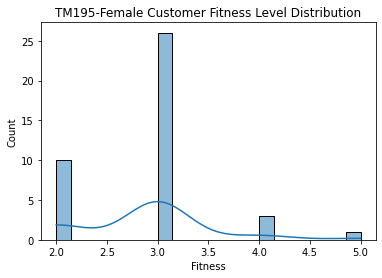

In [106]:
#Univariate Analysis of Fitness grouped by Gender for the Product TM195
sns.histplot(x = "Fitness", data = TM195, kde = True)
plt.title("TM195 Customer Fitness Distribution")
plt.show()
sns.histplot(x = "Fitness", data = TM195_Male, kde = True)
plt.title("TM195-Male Customer Fitness Level Distribution")
plt.show()
sns.histplot(x = "Fitness", data = TM195_Female, kde = True)
plt.title("TM195-Female Customer Fitness Level Distribution")
plt.show()

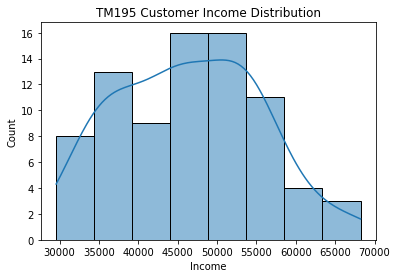

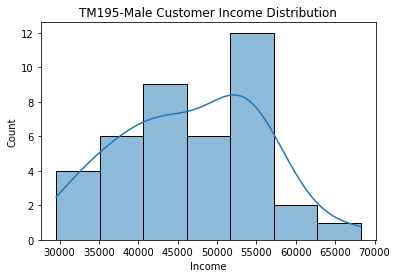

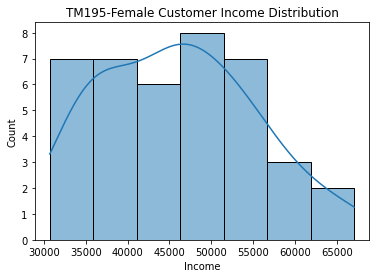

In [107]:
#Univariate Analysis of Income grouped by Gender for the Product TM195
sns.histplot(x = "Income", data = TM195, kde = True)
plt.title("TM195 Customer Income Distribution")
plt.show()
sns.histplot(x = "Income", data = TM195_Male, kde = True)
plt.title("TM195-Male Customer Income Distribution")
plt.show()
sns.histplot(x = "Income", data = TM195_Female, kde = True)
plt.title("TM195-Female Customer Income Distribution")
plt.show()

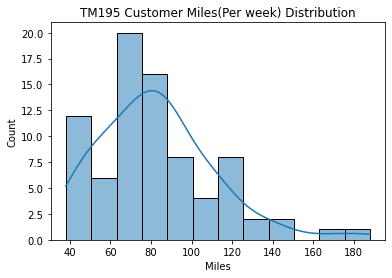

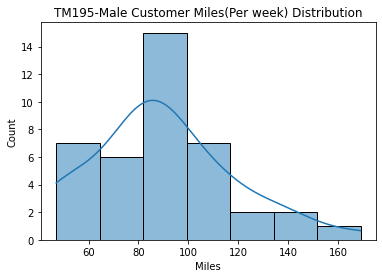

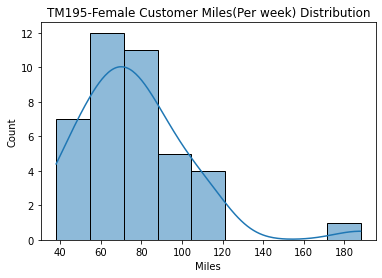

In [108]:
#Univariate Analysis of Miles grouped by Gender for the Product TM195
sns.histplot(x = "Miles", data = TM195, kde = True)
plt.title("TM195 Customer Miles(Per week) Distribution")
plt.show()
sns.histplot(x = "Miles", data = TM195_Male, kde = True)
plt.title("TM195-Male Customer Miles(Per week) Distribution")
plt.show()
sns.histplot(x = "Miles", data = TM195_Female, kde = True)
plt.title("TM195-Female Customer Miles(Per week) Distribution")
plt.show()

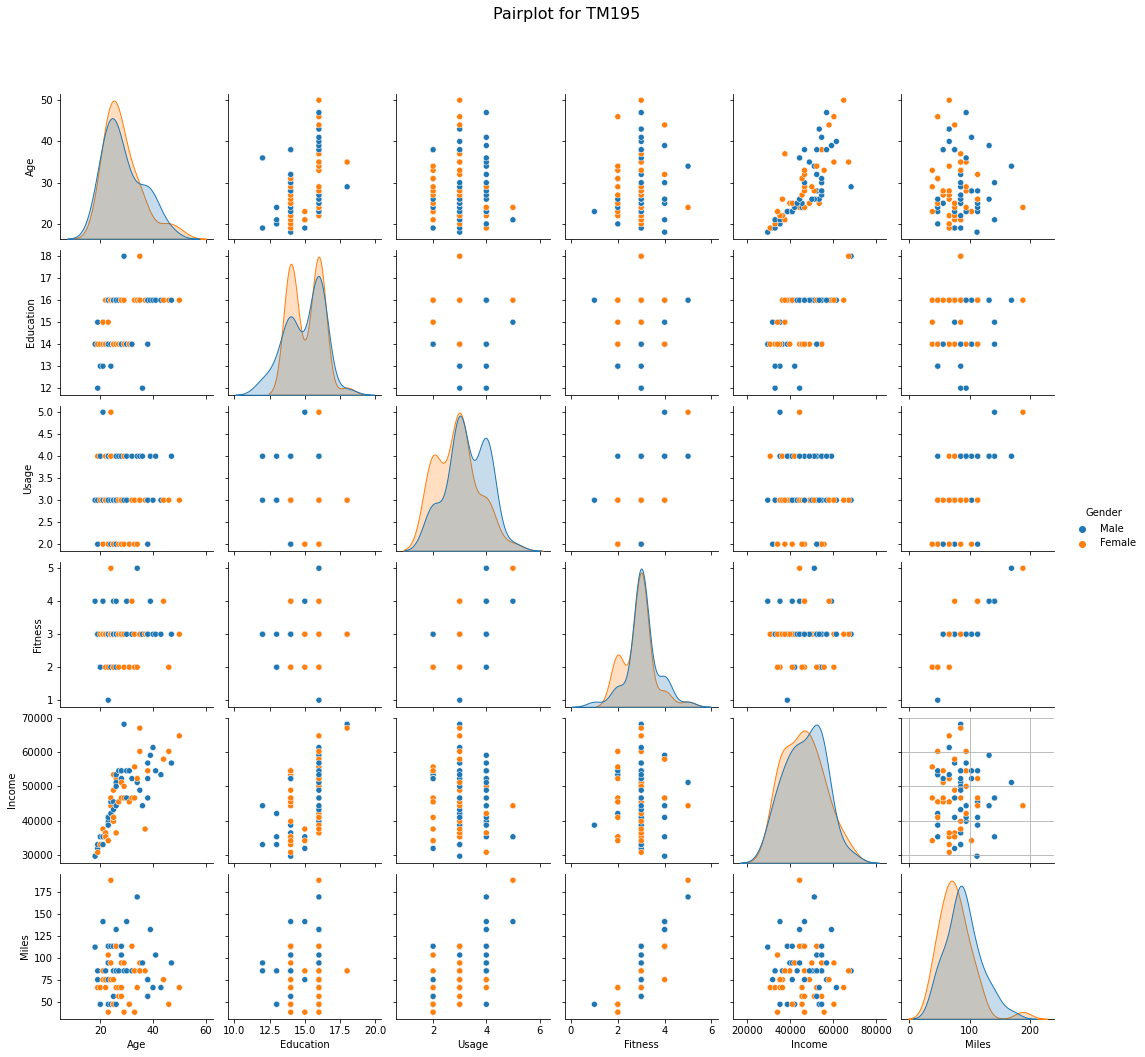

In [109]:
#Product TM195 Pairplot
#Plot the multivariate pairplot to check the relations between numeric variables
sns.pairplot(TM195, hue = "Gender")
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot for TM195" ,fontsize = 16)
plt.grid(True)
plt.show()

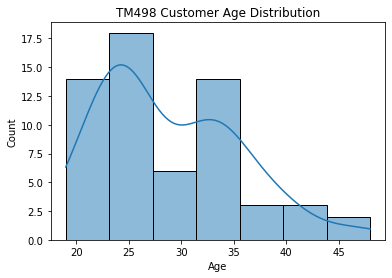

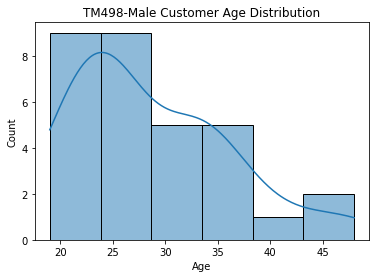

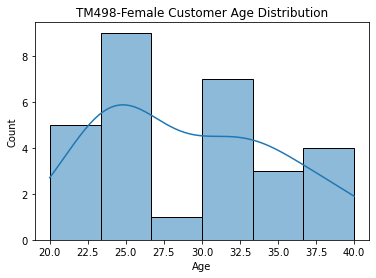

In [110]:
#Univariate Analysis of Age grouped by Gender for the Product TM498
sns.histplot(x = "Age", data = TM498, kde = True)
plt.title("TM498 Customer Age Distribution")
plt.show()
sns.histplot(x = "Age", data = TM498_Male, kde = True)
plt.title("TM498-Male Customer Age Distribution")
plt.show()
sns.histplot(x = "Age", data = TM498_Female, kde = True)
plt.title("TM498-Female Customer Age Distribution")
plt.show()

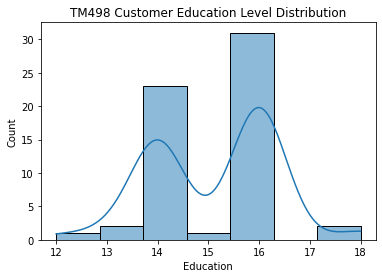

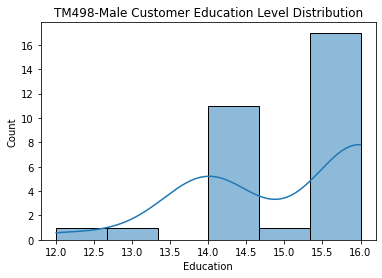

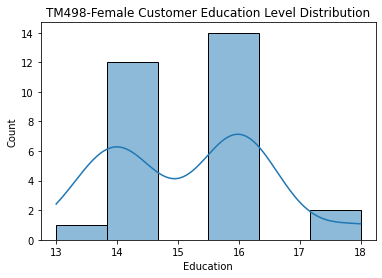

In [111]:
#Univariate Analysis of Education level grouped by Gender for the Product TM498
sns.histplot(x = "Education", data = TM498, kde = True)
plt.title("TM498 Customer Education Level Distribution")
plt.show()
sns.histplot(x = "Education", data = TM498_Male, kde = True)
plt.title("TM498-Male Customer Education Level Distribution")
plt.show()
sns.histplot(x = "Education", data = TM498_Female, kde = True)
plt.title("TM498-Female Customer Education Level Distribution")
plt.show()

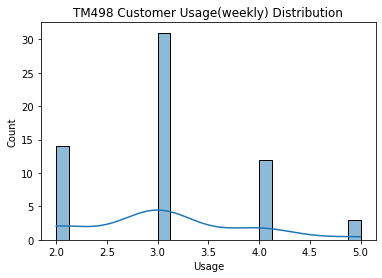

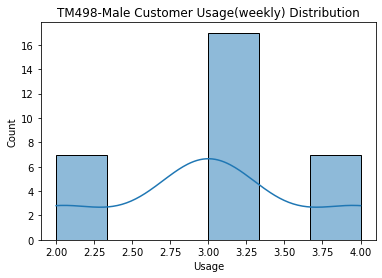

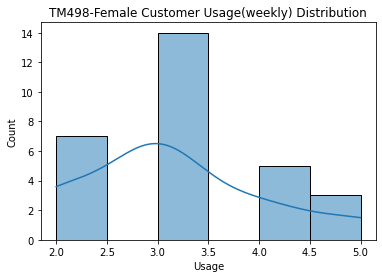

In [112]:
#Univariate Analysis of Usage grouped by Gender for the Product TM498
sns.histplot(x = "Usage", data = TM498, kde = True)
plt.title("TM498 Customer Usage(weekly) Distribution")
plt.show()
sns.histplot(x = "Usage", data = TM498_Male, kde = True)
plt.title("TM498-Male Customer Usage(weekly) Distribution")
plt.show()
sns.histplot(x = "Usage", data = TM498_Female, kde = True)
plt.title("TM498-Female Customer Usage(weekly) Distribution")
plt.show()

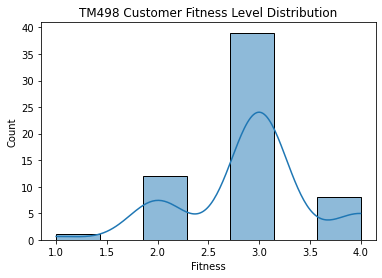

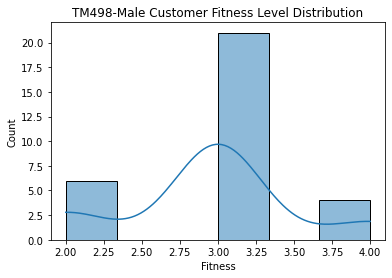

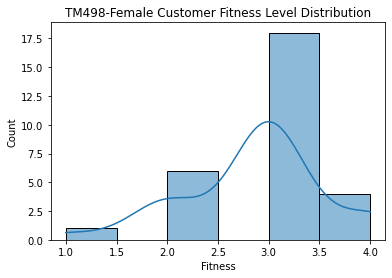

In [113]:
#Univariate Analysis of Fitness Level grouped by Gender for the Product TM498
sns.histplot(x = "Fitness", data = TM498, kde = True)
plt.title("TM498 Customer Fitness Level Distribution")
plt.show()
sns.histplot(x = "Fitness", data = TM498_Male, kde = True)
plt.title("TM498-Male Customer Fitness Level Distribution")
plt.show()
sns.histplot(x = "Fitness", data = TM498_Female, kde = True)
plt.title("TM498-Female Customer Fitness Level Distribution")
plt.show()

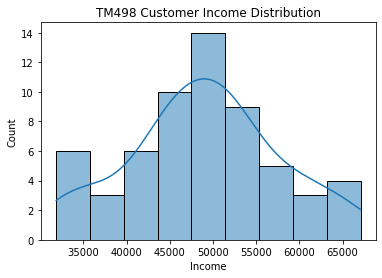

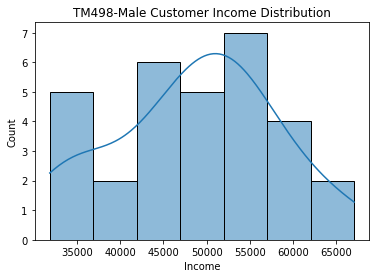

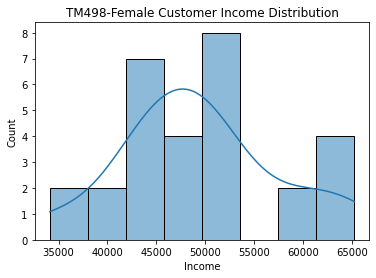

In [114]:
#Univariate Analysis of Income grouped by Gender for the Product TM498
sns.histplot(x = "Income", data = TM498, kde = True)
plt.title("TM498 Customer Income Distribution")
plt.show()
sns.histplot(x = "Income", data = TM498_Male, kde = True)
plt.title("TM498-Male Customer Income Distribution")
plt.show()
sns.histplot(x = "Income", data = TM498_Female, kde = True)
plt.title("TM498-Female Customer Income Distribution")
plt.show()

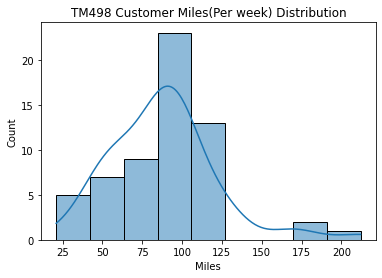

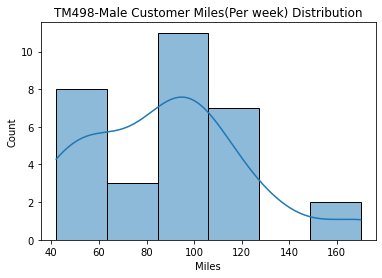

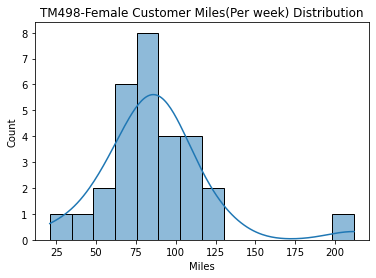

In [115]:
#Univariate Analysis of Miles grouped by Gender for the Product TM498
sns.histplot(x = "Miles", data = TM498, kde = True)
plt.title("TM498 Customer Miles(Per week) Distribution")
plt.show()
sns.histplot(x = "Miles", data = TM498_Male, kde = True)
plt.title("TM498-Male Customer Miles(Per week) Distribution")
plt.show()
sns.histplot(x = "Miles", data = TM498_Female, kde = True)
plt.title("TM498-Female Customer Miles(Per week) Distribution")
plt.show()

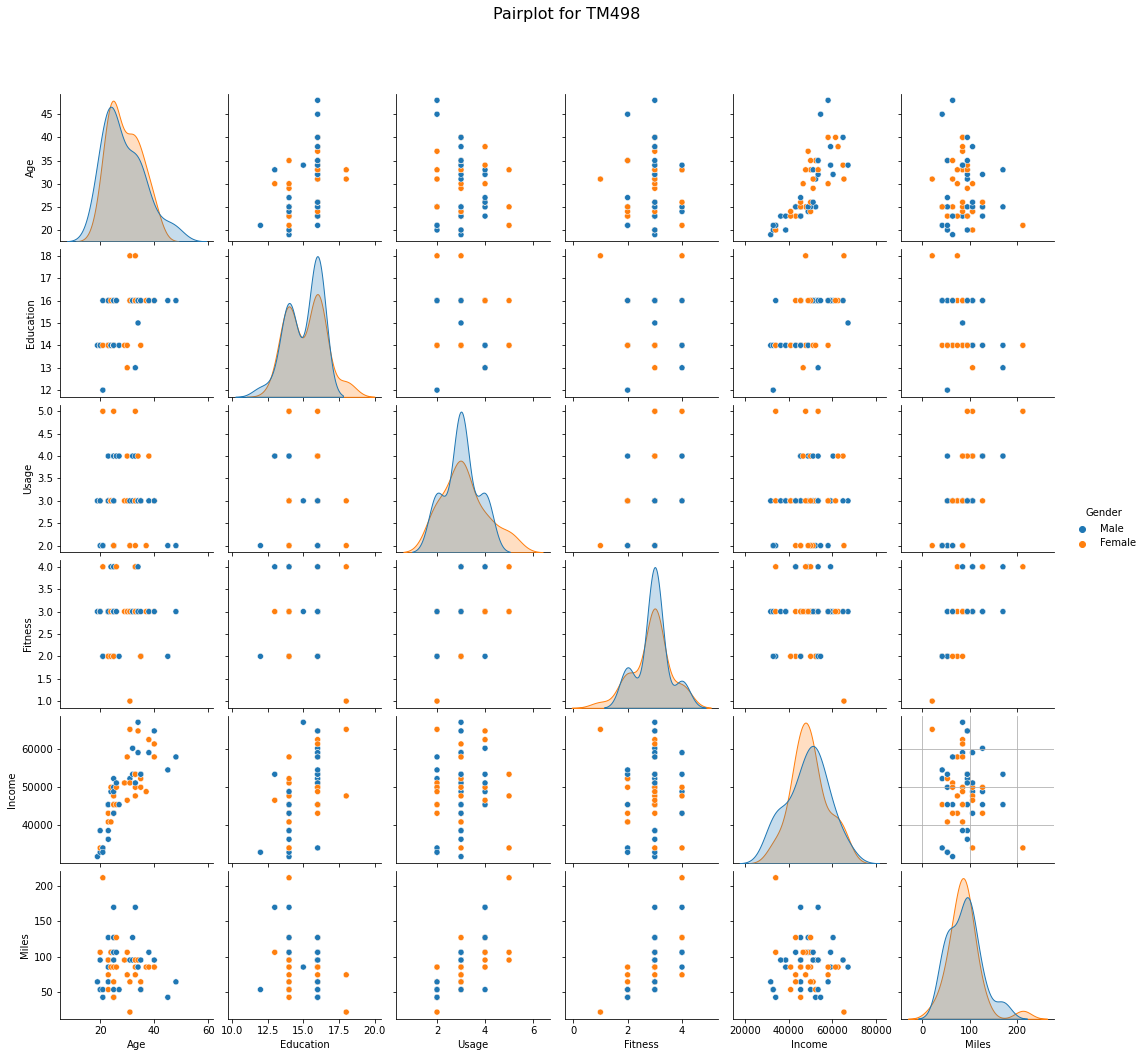

In [116]:
#Product TM498 Pairplot
#Plot the multivariate pairplot to check the relations between numeric variables
sns.pairplot(TM498, hue = "Gender")
#To get space above the plot for title
plt.subplots_adjust(top=0.9)
#To make the title centered
plt.suptitle("Pairplot for TM498" ,fontsize = 16)
plt.grid(True)
plt.show()

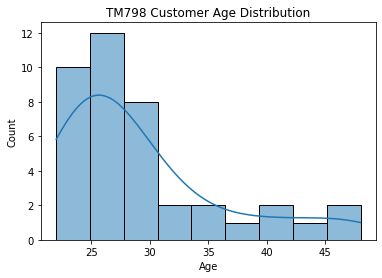

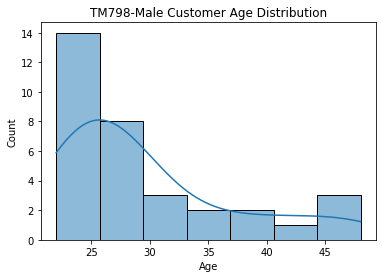

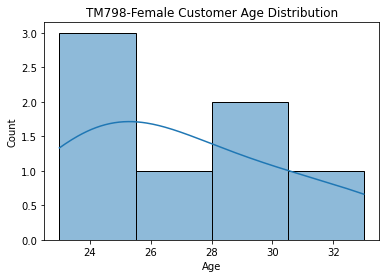

In [117]:
#Univariate Analysis of Age grouped by Gender for the Product TM798
sns.histplot(x = "Age", data = TM798, kde = True)
plt.title("TM798 Customer Age Distribution")
plt.show()
sns.histplot(x = "Age", data = TM798_Male, kde = True)
plt.title("TM798-Male Customer Age Distribution")
plt.show()
sns.histplot(x = "Age", data = TM798_Female, kde = True)
plt.title("TM798-Female Customer Age Distribution")
plt.show()

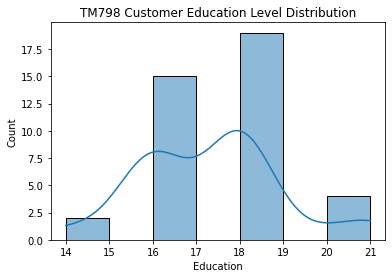

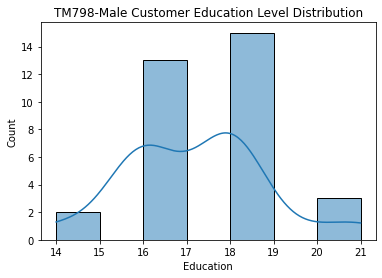

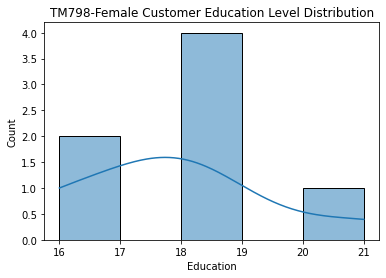

In [118]:
#Univariate Analysis of Education grouped by Gender for the Product TM798
sns.histplot(x = "Education", data = TM798, kde = True)
plt.title("TM798 Customer Education Level Distribution")
plt.show()
sns.histplot(x = "Education", data = TM798_Male, kde = True)
plt.title("TM798-Male Customer Education Level Distribution")
plt.show()
sns.histplot(x = "Education", data = TM798_Female, kde = True)
plt.title("TM798-Female Customer Education Level Distribution")
plt.show()

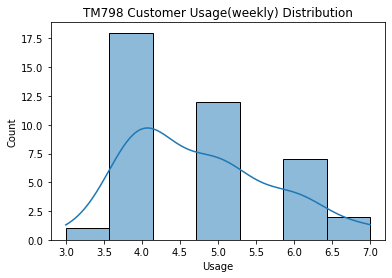

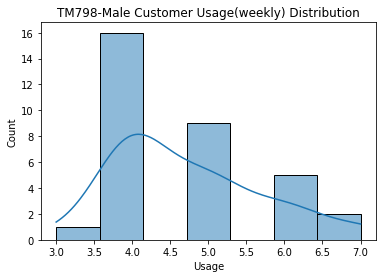

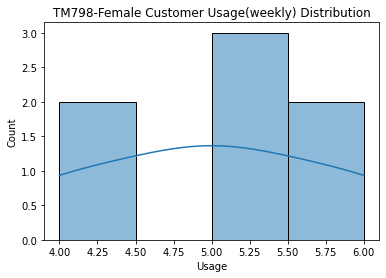

In [119]:
#Univariate Analysis of Usage grouped by Gender for the Product TM798
sns.histplot(x = "Usage", data = TM798, kde = True)
plt.title("TM798 Customer Usage(weekly) Distribution")
plt.show()
sns.histplot(x = "Usage", data = TM798_Male, kde = True)
plt.title("TM798-Male Customer Usage(weekly) Distribution")
plt.show()
sns.histplot(x = "Usage", data = TM798_Female, kde = True)
plt.title("TM798-Female Customer Usage(weekly) Distribution")
plt.show()

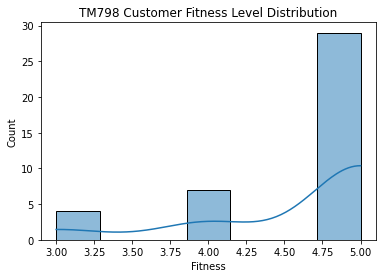

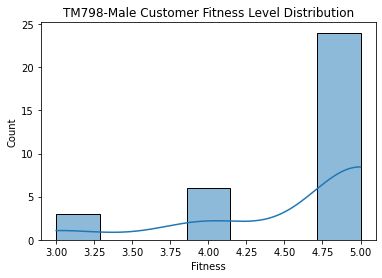

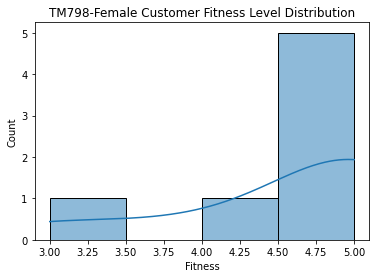

In [120]:
#Univariate Analysis of Fitness grouped by Gender for the Product TM798
sns.histplot(x = "Fitness", data = TM798, kde = True)
plt.title("TM798 Customer Fitness Level Distribution")
plt.show()
sns.histplot(x = "Fitness", data = TM798_Male, kde = True)
plt.title("TM798-Male Customer Fitness Level Distribution")
plt.show()
sns.histplot(x = "Fitness", data = TM798_Female, kde = True)
plt.title("TM798-Female Customer Fitness Level Distribution")
plt.show()

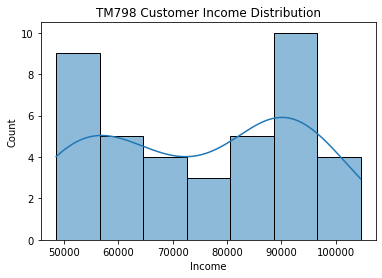

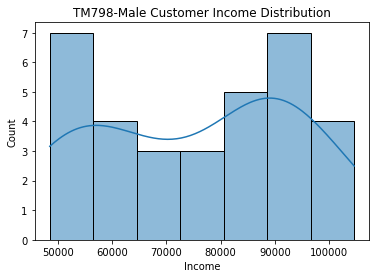

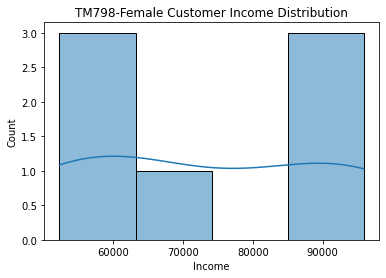

In [121]:
#Univariate Analysis of Income grouped by Gender for the Product TM798
sns.histplot(x = "Income", data = TM798, kde = True)
plt.title("TM798 Customer Income Distribution")
plt.show()
sns.histplot(x = "Income", data = TM798_Male, kde = True)
plt.title("TM798-Male Customer Income Distribution")
plt.show()
sns.histplot(x = "Income", data = TM798_Female, kde = True)
plt.title("TM798-Female Customer Income Distribution")
plt.show()

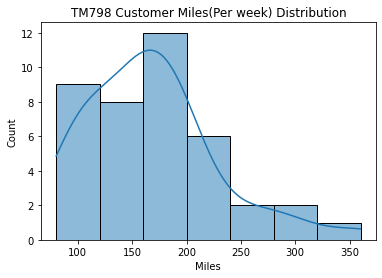

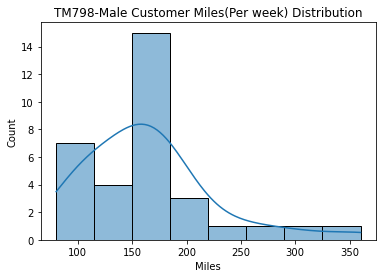

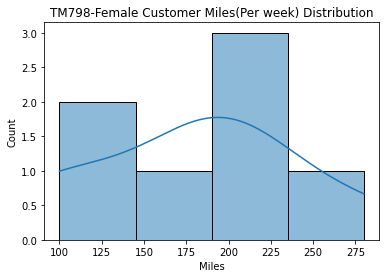

In [122]:
#Univariate Analysis of Miles grouped by Gender for the Product TM798
sns.histplot(x = "Miles", data = TM798, kde = True)
plt.title("TM798 Customer Miles(Per week) Distribution")
plt.show()
sns.histplot(x = "Miles", data = TM798_Male, kde = True)
plt.title("TM798-Male Customer Miles(Per week) Distribution")
plt.show()
sns.histplot(x = "Miles", data = TM798_Female, kde = True)
plt.title("TM798-Female Customer Miles(Per week) Distribution")
plt.show()

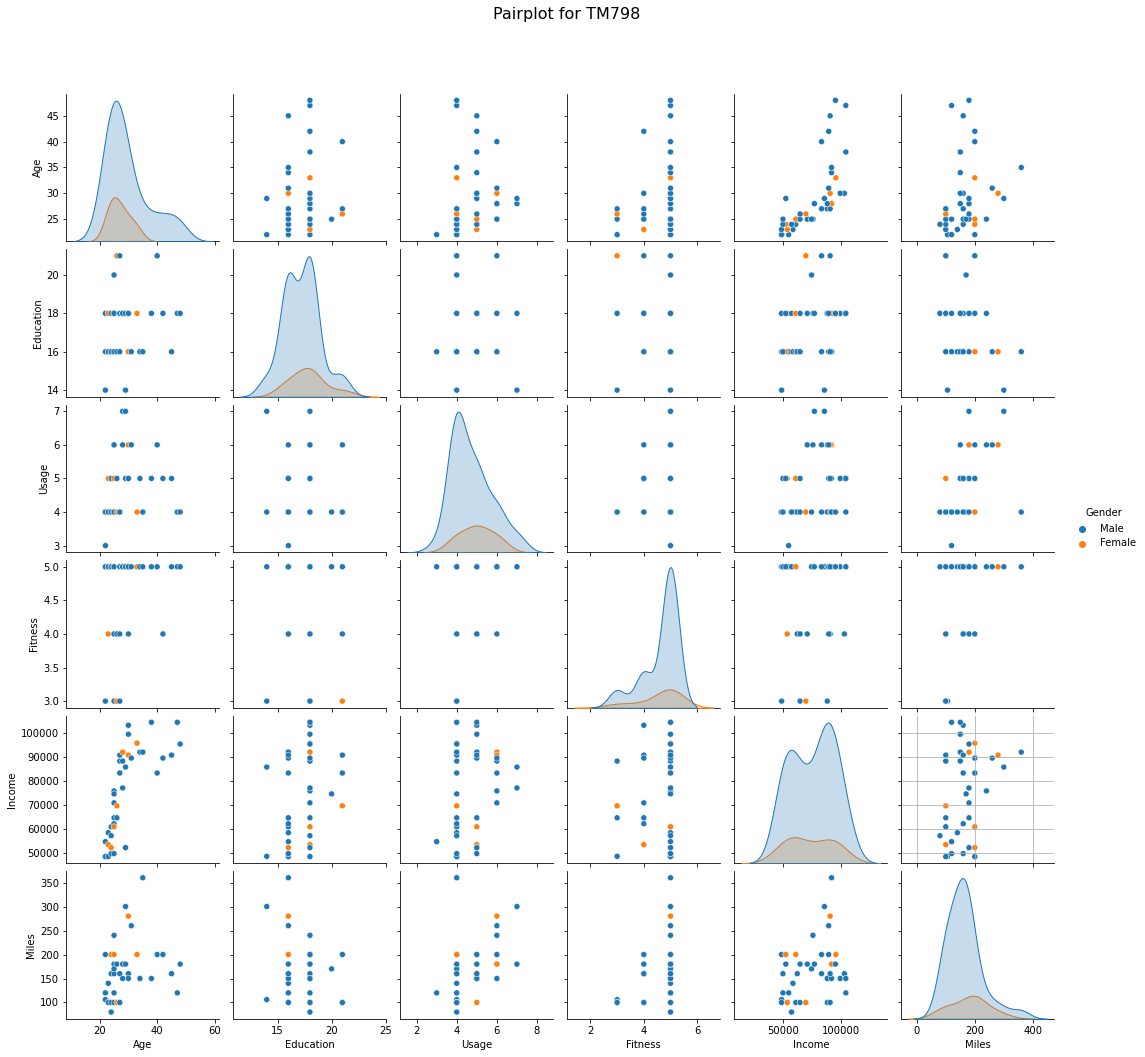

In [123]:
#Product TM798 Pairplot
#Plot the multivariate pairplot to check the relations between numeric variables
sns.pairplot(TM798, hue = "Gender")
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot for TM798" ,fontsize = 16)
plt.grid(True)
plt.show()

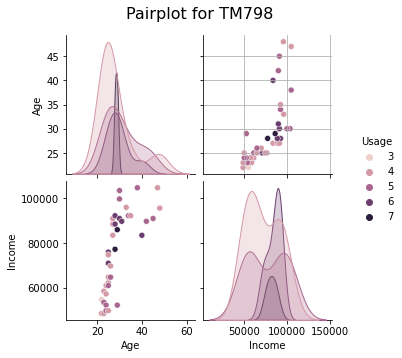

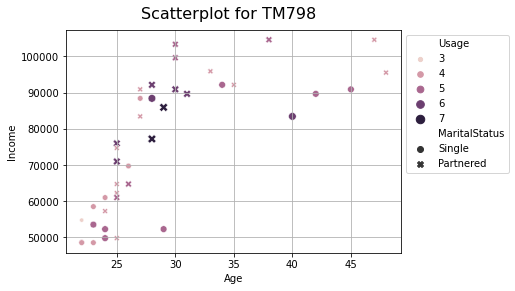

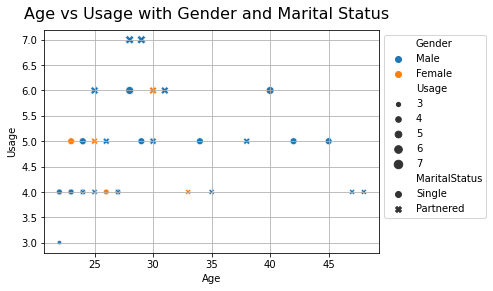

In [124]:
#Product TM798 Pairplot
#Plot the multivariate pairplot to check the relations between numeric variables
sns.pairplot(TM798,vars=['Age', 'Income'], hue = "Usage")
plt.subplots_adjust(top=0.9)
plt.suptitle("Pairplot for TM798" ,fontsize = 16)
plt.grid(True)
plt.show() 
#Product TM798 Pairplot
#Plot the multivariate scatterplot to check the relations between numeric variables
sns.scatterplot(x = 'Age', y = 'Income',data =TM798, hue = "Usage", size = "Usage",style ="MaritalStatus")
plt.subplots_adjust(top=0.9)
plt.suptitle("Scatterplot for TM798" ,fontsize = 16)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
#Plot the multivariate scatterplot to check the relations between numeric variables
sns.scatterplot(x = 'Age', y = 'Usage',data =TM798, hue = "Gender", size = "Usage",style ="MaritalStatus")
plt.subplots_adjust(top=0.9)
plt.suptitle("Age vs Usage with Gender and Marital Status" ,fontsize = 16)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


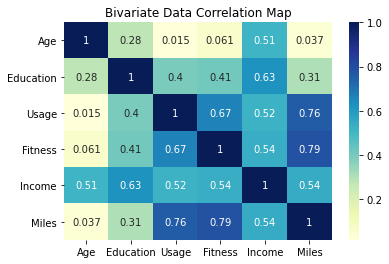

In [125]:
#Check the bivariate correlation between the numeric variables
print(fitness_data.corr())
#Plot the bivariate correlation between the numeric varaibles
sns.heatmap(fitness_data.corr(), annot=True , cmap = "YlGnBu")
plt.title("Bivariate Data Correlation Map")
plt.show()

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.336268 -0.015342  0.054469  0.751831 -0.064632
Education  0.336268   1.000000  0.169369  0.111379  0.446551  0.111956
Usage     -0.015342   0.169369  1.000000  0.468825 -0.052227  0.645576
Fitness    0.054469   0.111379  0.468825  1.000000  0.005906  0.826177
Income     0.751831   0.446551 -0.052227  0.005906  1.000000 -0.039377
Miles     -0.064632   0.111956  0.645576  0.826177 -0.039377  1.000000


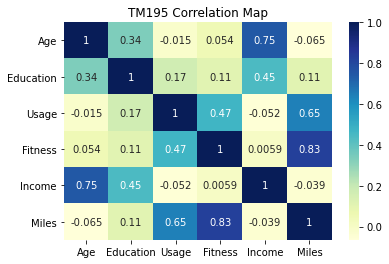

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.306502  0.128214  0.115791  0.736612  0.017688
Education  0.306502   1.000000  0.082927  0.141681  0.469891  0.098034
Usage      0.128214   0.082927  1.000000  0.375634 -0.021201  0.580850
Fitness    0.115791   0.141681  0.375634  1.000000  0.007870  0.858658
Income     0.736612   0.469891 -0.021201  0.007870  1.000000 -0.034788
Miles      0.017688   0.098034  0.580850  0.858658 -0.034788  1.000000


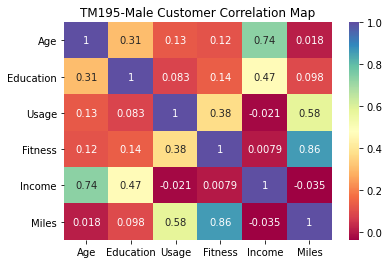

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.380839 -0.167807 -0.015304  0.768547 -0.162802
Education  0.380839   1.000000  0.317026  0.091489  0.432790  0.166230
Usage     -0.167807   0.317026  1.000000  0.534125 -0.106020  0.668699
Fitness   -0.015304   0.091489  0.534125  1.000000 -0.007924  0.788924
Income     0.768547   0.432790 -0.106020 -0.007924  1.000000 -0.067040
Miles     -0.162802   0.166230  0.668699  0.788924 -0.067040  1.000000


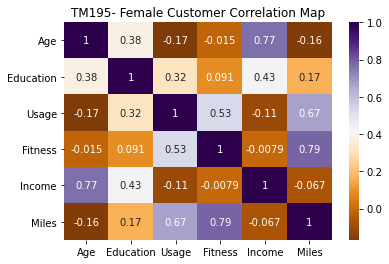

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.472956 -0.078458 -0.026730  0.787550 -0.124710
Education  0.472956   1.000000 -0.112105 -0.094660  0.540207 -0.240293
Usage     -0.078458  -0.112105  1.000000  0.349996  0.073367  0.673648
Fitness   -0.026730  -0.094660  0.349996  1.000000 -0.008086  0.676894
Income     0.787550   0.540207  0.073367 -0.008086  1.000000 -0.054691
Miles     -0.124710  -0.240293  0.673648  0.676894 -0.054691  1.000000


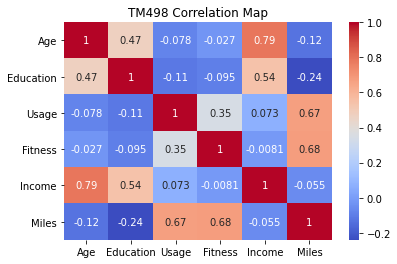

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.167617  0.120007  0.212141  0.713489  0.243106
Education  0.167617   1.000000 -0.017758 -0.166991  0.252306 -0.228587
Usage      0.120007  -0.017758  1.000000  0.228182  0.281543  0.503106
Fitness    0.212141  -0.166991  0.228182  1.000000  0.110507  0.391083
Income     0.713489   0.252306  0.281543  0.110507  1.000000  0.309289
Miles      0.243106  -0.228587  0.503106  0.391083  0.309289  1.000000


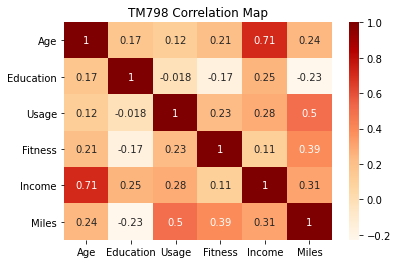

In [126]:
#Check the bivariate correlation between the numeric variables using heat maps for different Products
print(TM195.corr())
sns.heatmap(TM195.corr(), annot=True , cmap = "YlGnBu")
plt.title("TM195 Correlation Map")
plt.show()
print(TM195_Male.corr())
sns.heatmap(TM195_Male.corr(), annot=True , cmap = "Spectral")
plt.title("TM195-Male Customer Correlation Map")
plt.show()
print(TM195_Female.corr())
sns.heatmap(TM195_Female.corr(), annot=True , cmap = "PuOr")
plt.title("TM195- Female Customer Correlation Map")
plt.show()
print(TM498.corr())
sns.heatmap(TM498.corr(), annot=True , cmap = "coolwarm")
plt.title("TM498 Correlation Map")
plt.show()
print(TM798.corr())
sns.heatmap(TM798.corr(), annot=True , cmap = "OrRd")
plt.title("TM798 Correlation Map")
plt.show()
#Observations
#There are no strong negative correlations
#Fitness vs Miles has a strong correlation followed by Usage vs Miles
#Usage vs Fitness has a sizable correlaion
#Education vs Income is also positively correlation
#Income vs Miles and Income vs fitness have to be analysed more for a clear picture on the correlation

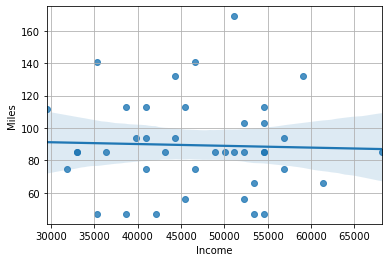

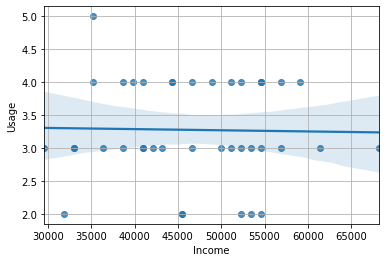

In [127]:
#Customer's Income has a negative correlation with their Miles for TM195 Male grouping
sns.regplot(x = "Income" , y = "Miles" , data = TM195_Male)
plt.grid(True)
plt.show()
#Observation
#No strong correlationNot a sizable conclusion
#Customer's usage has a negative correlation with their Income for TM195 Male grouping
sns.regplot(x = "Income" , y = "Usage" , data = TM195_Male)
plt.grid(True)
plt.show()
#Observation
#No strong correlation.Not a sizable conclusion

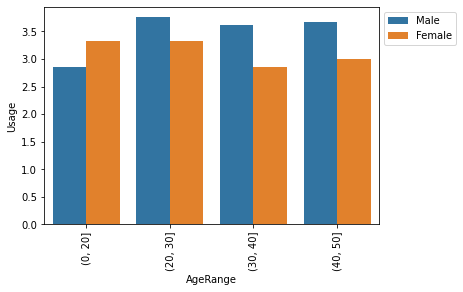

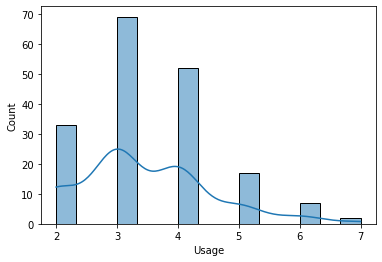

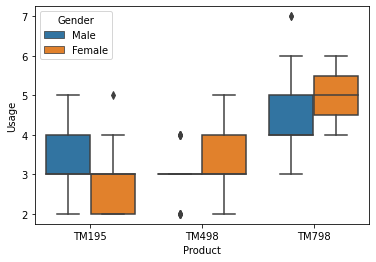

In [128]:
#Plot the Age vs usage for both genders
sns.barplot(x='AgeRange', y='Usage', data= fitness_data, ci=None, hue = 'Gender')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()
#Plot Univariate for Usage
sns.histplot(fitness_data.Usage, kde = True)
plt.show()
#Plot stacked bar to show the usage by Product
sns.boxplot(x = "Product" , y = "Usage",hue = "Gender" , data = fitness_data )
plt.show()
#Observations
#TM195 and TM498 customers use the product at an average of 3 times a week
#TM798 is being used by customers at an average of 5 times a week

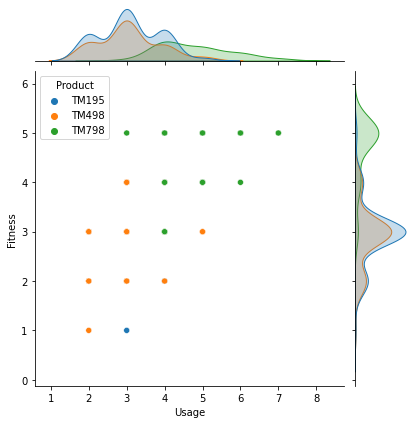

In [129]:
#Bivariate plot for Usage vs Fitness across Products
sns.jointplot(x = "Usage" , y = "Fitness" , hue = "Product", data = fitness_data)
plt.show()
#Observation
#Customer using TM195 and TM498 has an average fitness of 3(mean value) versus the TM798 customer fitness of 5(highest)

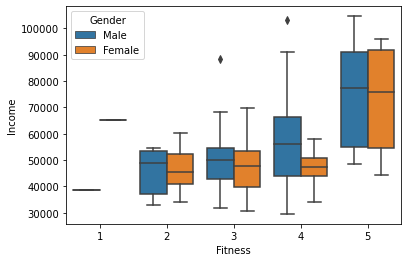

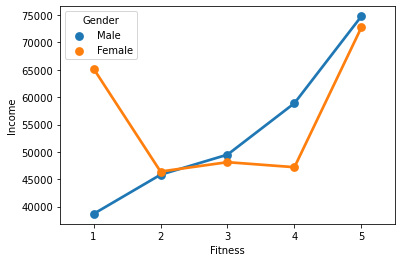

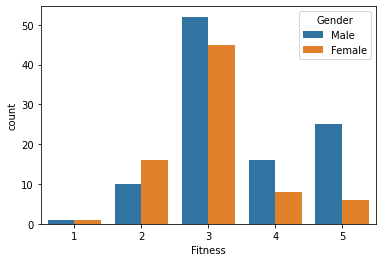

In [130]:
#Check for Income vs Fitness Bivariate correlation
sns.boxplot(x = "Fitness", y = "Income",hue = "Gender" ,data = fitness_data)
plt.show()
sns.pointplot(x = "Fitness" , y = "Income", hue = "Gender",data = fitness_data, ci = None)
plt.show()
sns.countplot(x = "Fitness", hue = "Gender", data = fitness_data)
plt.show()
#Observations
#There is a positive correlation for income vs fitness for male customers,as the income increases the fitness level also increase

15.572222222222223


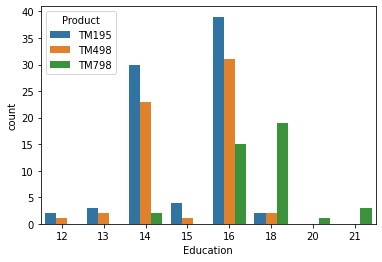

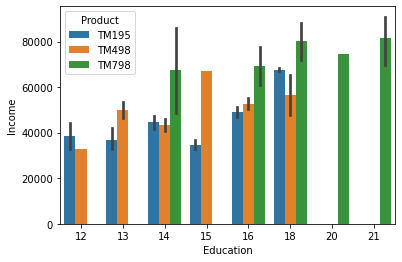

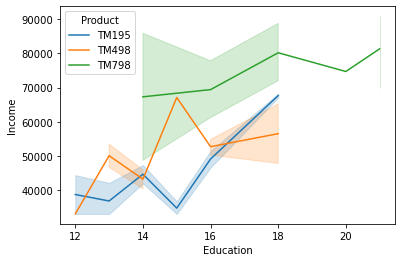

In [131]:
#Plot Education vs Income correlation
sns.countplot(x = "Education",hue = "Product",data = fitness_data)
print (fitness_data["Education"].mean())
plt.show()
sns.barplot(x = "Education" , y = "Income" , hue = "Product", data = fitness_data)
plt.show()
sns.lineplot(x = "Education" , y = "Income" , hue = "Product", data = fitness_data)
plt.show()
#Observations:
#Customers with Education level 16 are the maximum users of all the three products
#TM798 is popular among the highly educated and high income customer

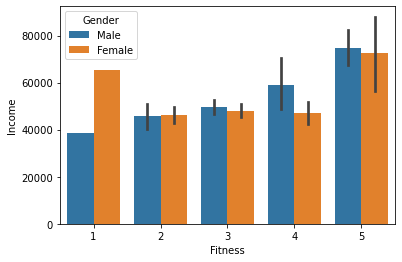

In [132]:
#Cross verify Bivariate Analysis results from box plot of Fitness vs Income using bar plot
sns.barplot(x= "Fitness", y = "Income", hue = "Gender", data = fitness_data)
plt.show()

In [133]:
#Conclusions
#Customers with Education level 16 are the maximum users of all the three products.
#TM798 is popular among the highly educated and high income customer(mean =75k)
#Customer using TM195 and TM498 has an average fitness of 3(mean value) versus the TM798 customer fitness of 5(highest).
#TM195 and TM498 customers use the product at an average of 3 times a week and TM798 is being used by customers at an average of 5 times a week.
#The maximum number of customers for each of the three products are in the agerange of 20 - 35 years of age.
#Product TM195 has the highest number of customers among all the three products in the sample data.
#Partnered customers are one and half times more than the single customer category.
#For TM195 and TM498 gender do not affect the buying process.
#For TM798 the male customers are more in the given data Sample.
#Male Customers log more miles than female customers for TM195 and TM498
#TM798 has female customers logging more miles however the sample data is too less to certainly confirm on this conclusion.
#There is a positive correlation for income vs fitness for male customers,as the income increases the fitness level also increases.


In [ ]:
#Recommendations
#Target Customers for all the three Products lie in the Age range of 20- 35 years of Age.
#Partnered Customers outshine the single customers for all the three Products.
#TM195 is the highly used product among male and Female Customers.
#TM798 is popular among High Income and highly fit people .
#More educated(Education level >=16) people are fitness focussed than the less educated and can be targeted for Product Sales.
